# Thera Bank Personal Loan Campaign

## Develop classification model to predict the likelihood of a liability customer buying personal loans

### Data Dictionary:

#### ID: Customer ID 
#### Age: Customer's age in completed years 
#### Experience: #years of professional experience 
#### Income: Annual income of the customer (in 000s) 
#### ZIP Code: Home Address ZIP code. 
#### Family: Family size of the customer 
#### CCAvg: Avg. spending on credit cards per month (in 000s) 
#### Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional 
#### Mortgage: Value of house mortgage if any. (in 000s) 
#### Personal Loan: Did this customer accept the personal loan offered in the last campaign? (only 480 (= 9.6%) out of 5000)
#### Securities Account: Does the customer have a securities account with the bank? 
#### CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
#### Online: Does the customer use internet banking facilities? 
#### Credit card: Does the customer use a credit card issued by the bank? 

 







## Step 1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. 

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt                     # to plot
%matplotlib inline
import seaborn as sns                               # to plot

from sklearn.linear_model import LogisticRegression # to model
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn import metrics                         # to evaluate model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn import preprocessing
from scipy import stats

 



In [117]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [118]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Check data type, null values (below)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


### From info(): Dtype above is datatype. 
### From info(): No null values
### From head() and tail():
### Numeric values: ID, Age, Experience, Income, Zip Code, CCAvg, Mortgage (7)
### Boolean: Personal Loan, Securities Account, CD Account, Online, CreditCard
### Categorical: Family, Education
### ID is just serial number, we will drop it.
### Impute: No missing values, no need to impute. We have to treat outliers (do later in EDA)
### shape below

In [120]:
df.shape

(5000, 14)

In [121]:
df_save=df.copy()

In [122]:
df.drop('ID', axis =1, inplace=True ) # drop it is just a serial no

### Statistical Summary below:

In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


## EDA

### Number of unique in each column

In [124]:
df_save.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage?

In [125]:
len(df[df['Mortgage'] == 0.0])


3462

### Number of people with zero credit card spending per month?

In [126]:
len(df[df['CCAvg'] == 0.0])

106

###  Value counts of all categorical columns (Family, Education)

In [127]:
    print(df['Family'].value_counts())
    print()
    print(df['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64


### Univariate and Bivariate

### Univariate

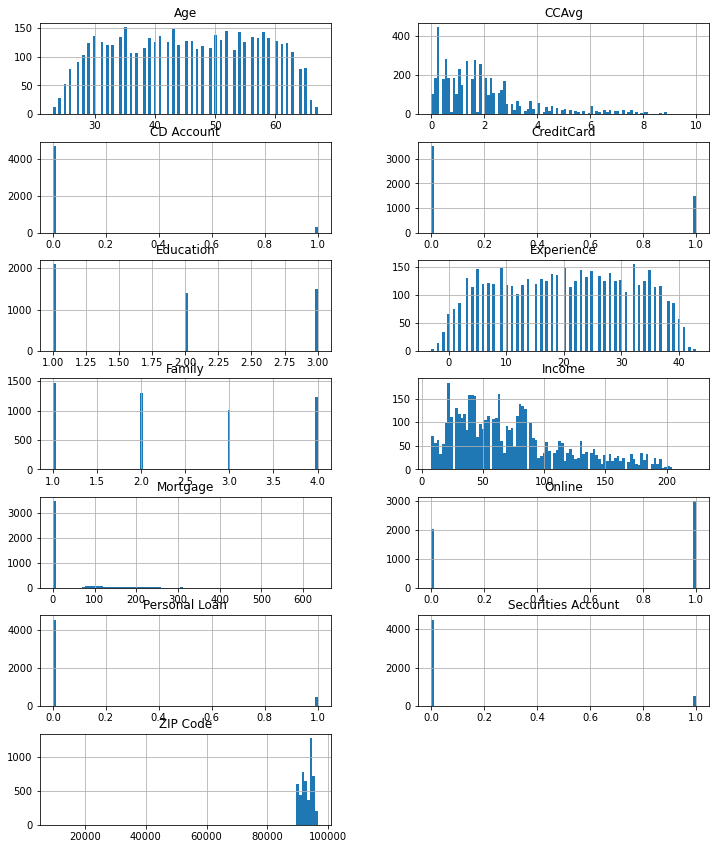

In [128]:
columns = list(df)[0:13] # all columns 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [129]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


#### Age and Experience are highly correelated (coefficient = 0.994215)

##### Let us plot and confirm above hypothesis and any other correlations. Below is the function. 

In [130]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

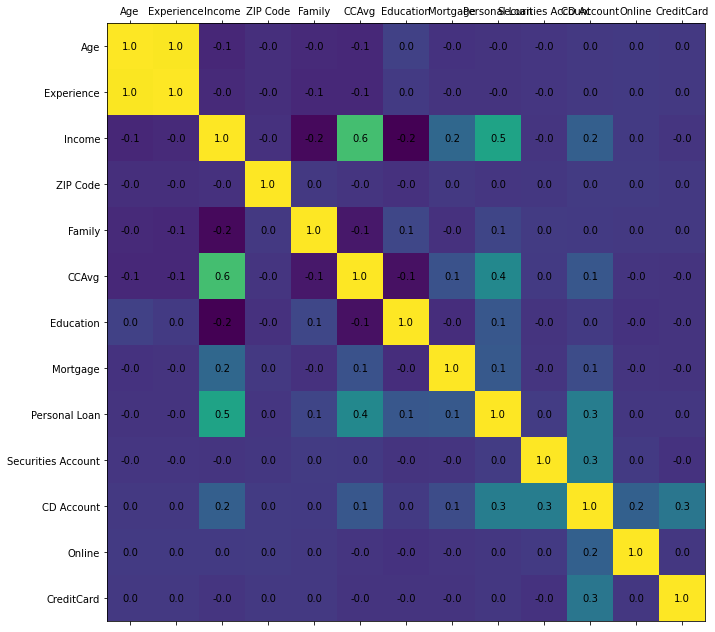

In [131]:
plot_corr(df);

#### From plot above confirming Age, Experience are highly corrleated, somewhat less but still Personal Loan is correlated to Income, CC Avg, CD Account. 

#### Look at Boolean types: Personal Loan, Securities Account, CD Account, Online, CreditCard

In [132]:
for i in ('Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'):
    print (len(df[df[i] == 0.0])/len(df[i]))
    print()

0.904

0.8956

0.9396

0.4032

0.706



#### 90% of customers didn't accept the personal loan offered in the last campaign
#### 90% doesn't have Securities Account with the bank
#### 94% doesn't have CD Account with the bank
#### 40% do not use internet banking facilities
#### 71% do not use bank's credit card

#### Categorical vars analysis
####  Family: Family size of the customer
#### Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional

In [133]:
    print(df['Family'].value_counts())
    print()
    print(df['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64


(array([0.2944, 0.2592, 0.202 , 0.2444]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

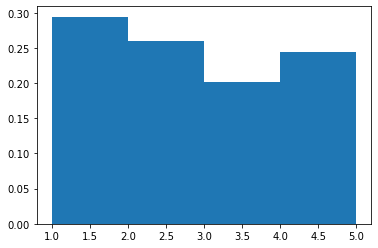

In [134]:
plotdata = df['Family']
plt.hist(plotdata,bins=[1,2,3,4,5],density=True)

(array([0.4192, 0.2806, 0.3002]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

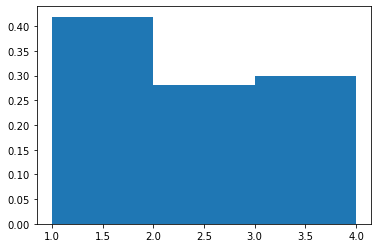

In [135]:
plotdata = df['Education']
plt.hist(plotdata,bins=[1,2,3,4],density=True)

#### Education distribution
#### Undergrad = 28% Graduate = 42%  Advanced = 30% #
#### Family Distributon
#### 1 = 29% 2 = 26% 3 = 20% 4 = 24%

#### Interesting variables of number type - Age, Income, CCAvg, Mortgage (excluding Experience which 
#### seems depenent of Age and Zip Code)

In [136]:
(df[['Age', 'Income', 'CCAvg', 'Mortgage']]).describe().transpose

<bound method DataFrame.transpose of                Age       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    73.774200     1.937938    56.498800
std      11.463166    46.033729     1.747659   101.713802
min      23.000000     8.000000     0.000000     0.000000
25%      35.000000    39.000000     0.700000     0.000000
50%      45.000000    64.000000     1.500000     0.000000
75%      55.000000    98.000000     2.500000   101.000000
max      67.000000   224.000000    10.000000   635.000000>

#### mean Age is 45, median 45, min 23, max 67. Fairly symmetrical
#### mean Income 74, median 64, min 8, max 224.  Positive skewed
#### mean CCAvg 1.94, median 1.5, min 0, max 10. Highly positively skewed
#### mean Mortgage 56, median 0, min 0, max 635. Highly postively skewed

### We can drop Experience (corr coef with Age is ~1.0) and Zip_Code  (not going to provide any value) 

In [137]:
df.drop('Experience', axis=1, inplace = True)
df.drop('ZIP Code', axis=1, inplace = True)

## We have some idea about data set, and ready to propose the approach before bivariate analysis
## 1. High Income customers will not go for personal loan, the other groups are the target
## 2. Personal loan is non-collateral and younger or close to end of career customers are not right target. Age 28 - 52 will go for personal loan
## 3. Education level Under Graduate will spend less, and other groups Graduate and Advanced are targets for personal loan

###  Bivariate analysis, verify validity of proposed approach and anything else

### High income customers is not the target

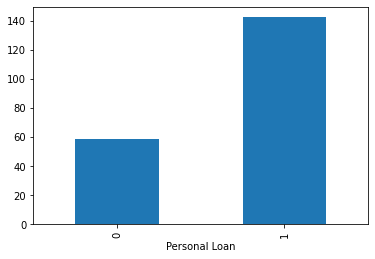

In [138]:
df.groupby('Personal Loan')['Income'].median().plot(kind='bar')

### Plot shows High income customers will not need personal loan proposal is wrong  

### Age group 28 - 52 is the target. Split into 4 groups min - 35(25%), 35 - 45(50%), 45 -55 (75%), 55 - 67(max)

In [139]:
groups=['Gen Z','Gen Y','Gen X','Baby Boom']
bins=[23,35,45,55,67]
df['Age Group']=pd.cut(df['Age'],bins,labels=groups)
age=pd.crosstab(df['Age Group'],df['Personal Loan'])
print(age.div(age.sum(1).astype(float),axis=0))
df.drop('Age Group', axis=1, inplace = True)

Personal Loan         0         1
Age Group                        
Gen Z          0.893819  0.106181
Gen Y          0.908434  0.091566
Gen X          0.906719  0.093281
Baby Boom      0.906250  0.093750


### Age based grouping approach to identify target customers is wrong

### Education level - Graduate , Advanced are the target customers, Under Grad is not

In [140]:
education=pd.crosstab(df['Education'],df['Personal Loan'])
print(education.div(education.sum(1).astype(float),axis=0))

Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


### Graduate, Advanced both are target and Under Grad is not theory is correct <<<---------------

### Can liability customers who keep CD deposits become personal loan customers

In [141]:
cd_account=pd.crosstab(df['CD Account'],df['Personal Loan'])
print(cd_account.div(cd_account.sum(1).astype(float),axis=0))

Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


### Customers who keep CD deposits seem to get personal loan from bank <<<-------------

### Does CCAvg indicate whether it influnced getting a personal loan?

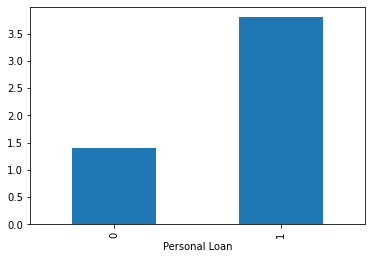

In [142]:
df.groupby('Personal Loan')['CCAvg'].median().plot(kind='bar')

### Customers who spend more on CC went for personal loan so a good target group  <<<-----------------------------

## Summary:
## Graduate, Advanced education both are target groups and Under Grad is not proposal is wrong
## Customers who keep CD deposits seem to get personal loan from bank
## Customers who spend more on CC went for personal loan so a good target group

## High income customers will not need personal loan theory is wrong
## Age based grouping approach to identify target customers is wrong



## Get data model ready

## Outliers

In [143]:
(df[['Age', 'Income', 'CCAvg', 'Mortgage']]).describe().transpose

<bound method DataFrame.transpose of                Age       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    73.774200     1.937938    56.498800
std      11.463166    46.033729     1.747659   101.713802
min      23.000000     8.000000     0.000000     0.000000
25%      35.000000    39.000000     0.700000     0.000000
50%      45.000000    64.000000     1.500000     0.000000
75%      55.000000    98.000000     2.500000   101.000000
max      67.000000   224.000000    10.000000   635.000000>

### CCAvg, Mortgage both are highly skewed. CCAvg is real distribution, have to accept it, but Mortgage outliers affects normal distribution and will affect the model. Treat it using Z Score.

In [144]:
df.shape

(5000, 11)

In [145]:
(df[['Mortgage']]).describe().transpose

<bound method DataFrame.transpose of           Mortgage
count  5000.000000
mean     56.498800
std     101.713802
min       0.000000
25%       0.000000
50%       0.000000
75%     101.000000
max     635.000000>

In [146]:
df['zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['zscore']<3]
df.drop('zscore',axis=1,inplace=True)

In [147]:
df.shape

(4895, 11)

## Split the data into training and test set in the ratio of 70:30 respectively

In [148]:
X = df.drop('Personal Loan',axis=1)
Y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [149]:
df.shape

(4895, 11)

In [150]:
X_train.shape

(3426, 10)

## Use Logistic Regression (Sklearn) model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [151]:
dfback = df.copy()
dfback.shape

(4895, 11)

In [152]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
y_predict = logreg.predict(X_test)

In [154]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9506713368359603

Testing accuracy 0.9475833900612661

Confusion Matrix


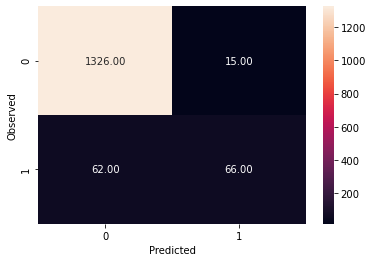

None

Recall: 0.515625

Precision: 0.8148148148148148

F1 Score: 0.6315789473684209

Roc Auc Score: 0.7522196588366891


In [155]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

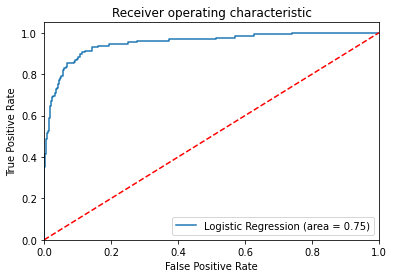

In [156]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Evaluate above model
### Accuracy of 0.94 is high. But among these 5000 customers, only 480 (= 9.6%) accepted the personal loan last time. So accuracy is not a good metric.
### Type I error - This represents non-buyer of personal loan, but model predicted as buyer. 
### Type II error - Buyer of loan, and model predicted as non-buyer. This should be improved.
### Area under the ROC Curve can be improved.


## Give your reasoning on how can the model perform better
### If we standardize as features have different units, it is expected model will perform better
### If we get Parameters of logistic regression and use different solvers with appropriate penalty it is expected model will perform better.


### We will try standarization

In [157]:
df.shape

(4895, 11)

In [158]:
col_names=df.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [159]:
logreg = LogisticRegression()
logreg.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_predict=logreg.predict(scaled_X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469

0.9530292716133424
[[1324   17]
 [  52   76]]


In [161]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(scaled_X_test))
print(logit_roc_auc)

0.7905364466815809


### Standardizing features improved metrics but not significantly.
### If we get Parameters of logistic regression and use different solvers with appropriate penalty it is expected model will perform better.


## Give Business understanding of your model

### Confusion matrix (on training model)

### True Positive (observed=1,predicted=1)
### Customer will take personal loan per model prediction
### False Negative (observed=1,predicted=0)
### Customer will take personal loan and model did not predict (Type II error)
### True Negative (observed=0,predicted=0)
### Customer will not take personal loan and model did not predict
### False Positive (observed=0,predicted=1)
### Customer will not take personal loan but model predicted (Type I error)

### Recall is the important matrix  (0.59) and model needs tuning to achieve higher recall
